<a href="https://colab.research.google.com/github/nehathipperudrappa/MINI-PROJECT-FEB/blob/main/IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader



In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("rose",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.parfumflowercompany.com/wp-content/uploads/2015/10/Yves-Piaget-Premium-Scented-Garden-Rose-from-the-Meilland-Jardin-Parfum-collection-022.png
[%] File Downloaded !

[%] Downloading Image #2 from http://www.rosesandrings.com/wp-content/uploads/2018/01/Deep-red-and-pale-blue-wedding-cake-with-baroque-gold-trim.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://3dprint.com/wp-content/uploads/2014/12/piranha-plant.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.hdwallpapers.in/download/super_saiyan_rose_black_goku_dragon_ball_super_4k-540x960.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://weneedfun.com/wp-content/uploads/2016/08/Cake-Boss-Wedding-Cakes-4-577x1024.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.parfumflowercompany.com/wp-content/uploads/2015/10/Pink-Yves-Piaget-Premium-Scented-Garden-Rose-from-the-Meil

In [ ]:
from bing_image_downloader import downloader
downloader.download("bicycle",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from https://www.dailyweekends.com/wp-content/uploads/2015/04/hot-girls-with-bicycles-10.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://geekologie.com/2010/02/19/zelda-magic-3.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://4.bp.blogspot.com/-R_jmRo_mleY/ULSWlJe2UrI/AAAAAAACCKM/0UZ7odYrPHs/s1600/Vintage+Photos+of+Girls+in+Mini+Skirts+on+Bikes+(24).jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn.diys.com/wp-content/uploads/2017/01/Family-Pallet-Wart-Art.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://i.ytimg.com/vi/ty9QSiVC2g0/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.himisspuff.com/wp-content/uploads/2016/08/centerpieces-contained-in-a-glass-terrarium.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.thegtaplace.com/images/sanandreas/screenshots/pc/sf_bicycle_3.jpg
[%] File 

In [ ]:
from bing_image_downloader import downloader
downloader.download("rugby ball leather",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://www.john-woodbridge.com/1032-large_default/1920s-rugby-ball.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.shopify.com/s/files/1/0788/5979/products/mvp-leather-balls-heritage-leather-t-soccer-ball-2_1024x1024.jpg?v=1554719760
[%] File Downloaded !

[%] Downloading Image #3 from https://www.john-woodbridge.com/1020-tm_large_default/1950s-football.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.academyballs.com/s/cc_images/teaserbox_1818127.jpg?t=1479054313
[%] File Downloaded !

[%] Downloading Image #5 from http://s3-ap-southeast-2.amazonaws.com/resources.farm1.mycms.me/goodbuddy-com-au/Resources/ProductImages/917_lo.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn.shopify.com/s/files/1/0020/1025/1324/products/32p_black_1024x.png?v=1534865418
[%] File Downloaded !

[%] Downloading Image #7 from http://atlas-content-cdn.pixelsqui

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['rose','bicycle','rugby ball leather']
 

for category in CATEGORIES:
 class_num = CATEGORIES.index(category)  # Label Encoding the values
 path = os.path.join(DATADIR,category)   # Create path to use all the images
 for img in os.listdir(path):
   img_array = imread(os.path.join(path,img))
   #print(img_array.shape)
   #plt.imshow(img_arrray)
   img_resized = resize(img_array,(150,150,3))
   flat_data.append(img_resized.flatten())
   images.append(img_resized)
   target.append(class_num)
   
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
flat_data[0]

array([0.0696732 , 0.02111111, 0.        , ..., 0.27410675, 0.27410675,
       0.27410675])

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=108)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_Grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_Grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 1, 0, 0, 1])

In [ ]:
y_test

array([0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2,
       2, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.8888888888888888

In [ ]:
confusion_matrix(y_pred,y_test)

array([[8, 0, 0],
       [3, 9, 0],
       [0, 0, 7]])

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.73      1.00      0.84         8\n           1       1.00      0.75      0.86        12\n           2       1.00      1.00      1.00         7\n\n    accuracy                           0.89        27\n   macro avg       0.91      0.92      0.90        27\nweighted avg       0.92      0.89      0.89        27\n'

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter Your URLhttps://pixnio.com/free-images/2017/11/03/2017-11-03-23-21-56.jpg
(1200, 1823, 3)
 PREDICTED OUTPUT: rose


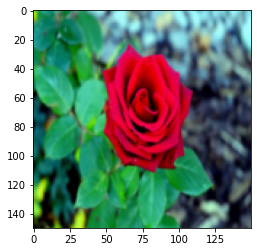

In [ ]:
flat_data = []
url = input('Enter Your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')